In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import load_model
from keras.preprocessing import image
from keras import models as models

import tensorflow as tf

Using TensorFlow backend.
/home/gabrijel/anaconda3/envs/machine-learning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
convolutional_model = load_model('cnn-from-scratch.h5')

In [3]:
convolutional_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
imgPath = os.getcwd() + '/datasets/training/train/cat/cat.10.jpg'

(1, 150, 150, 3)


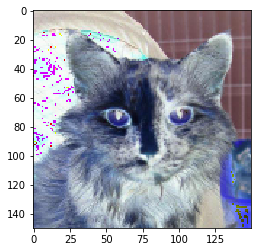

In [5]:
img = image.load_img(imgPath, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape((1, 150, 150, 3))
print(img_tensor.shape)
plt.imshow(img_tensor[0])

In [6]:
activationLayerOutputs = list()
activationLayerNames = list()
for layer in convolutional_model.layers:
    if('conv' in layer.name or 'max_pooling' in layer.name):
        activationLayerOutputs.append(layer.output)
        activationLayerNames.append(layer.name)
        
activation_model = models.Model(inputs=convolutional_model.input, outputs=activationLayerOutputs)

In [7]:
activatedLayers = activation_model.predict(img_tensor)

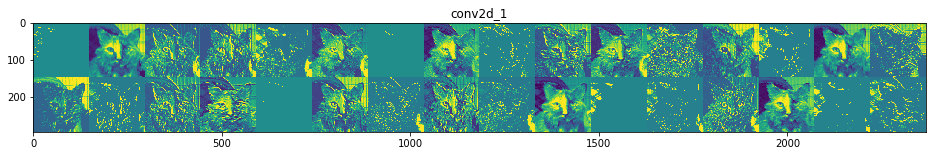

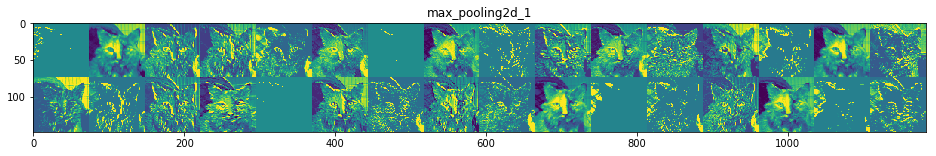

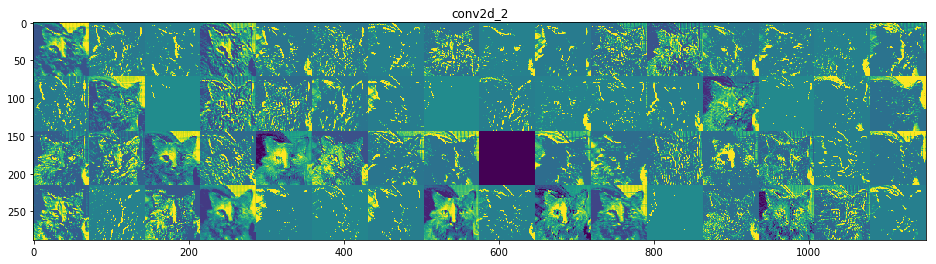

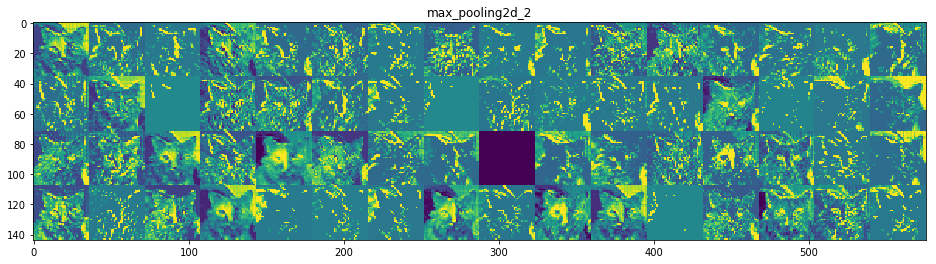

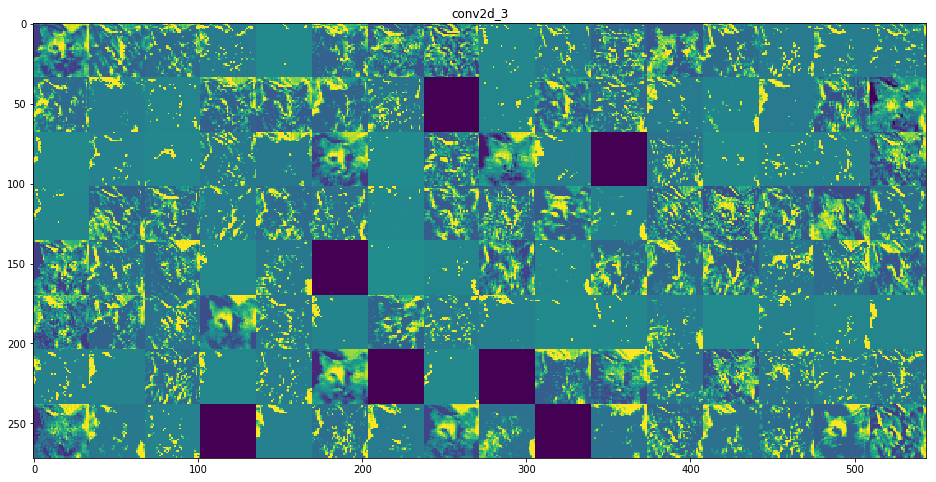

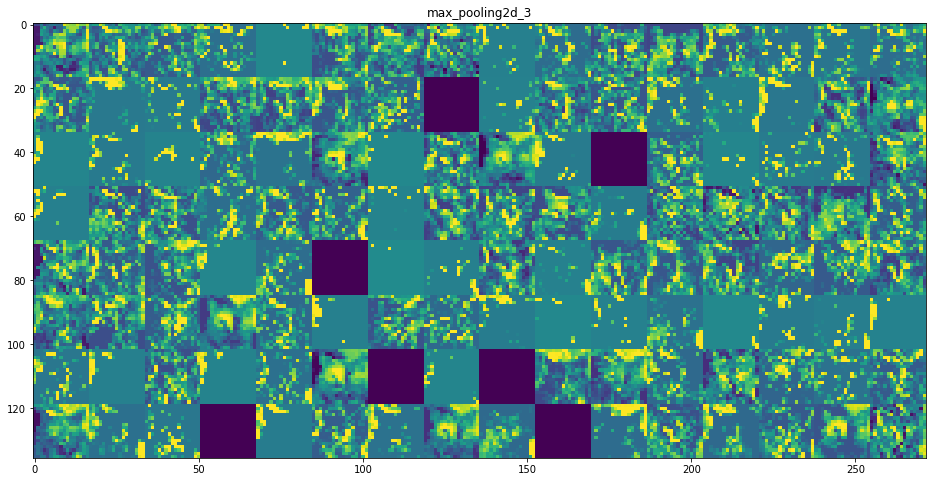

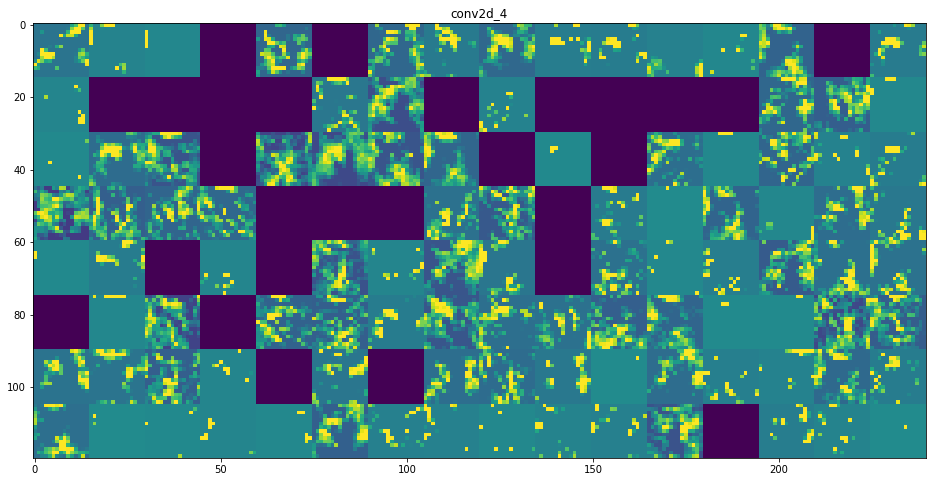

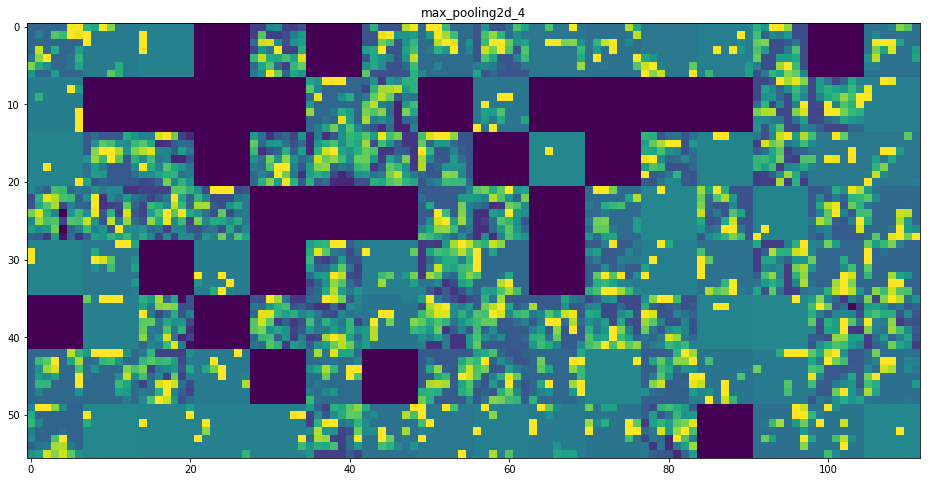

In [111]:
images_per_row = 16

for layer_name, layer_activation in zip(activationLayerNames, activatedLayers):
    _, size, size, filtersN = layer_activation.shape
    n_cols                  = filtersN // images_per_row
    display_grid            = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image   = layer_activation[0, :, :, col * images_per_row + row]
            channel_image   = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()